# Presentación medio termino 

# Juan José Campos Ruiz - A00826880

In [1]:
# En esta presentación analizaremos la situación social de los alumnos de la clase de Matematicas en la ciudad de Porto, Portugal.
# Podremos observar situaciones como el consumo de alcohol, relación con los padres, lugar de residencia, entre otras cosas
# Uno de las cosas que me llamó la atención fue que por logica se cree muchas veces que hijos de padres separados pueden
# tender a ir mal en la escuela y al parecer en este caso de estudio no lo es.

In [2]:
%pip install seaborn

     |████████████████████████████████| 292 kB 2.2 MB/s eta 0:00:01     |████████████████████▏           | 184 kB 2.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv('student-mat.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


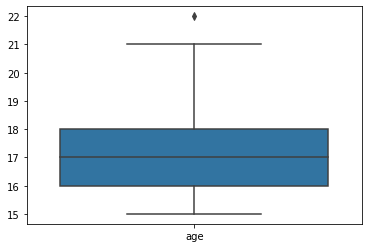

In [5]:
sns.boxplot(data=df.loc[:,['age']]) #Nos damos cuenta que la mayoria de los estudiantes estan entre los 16 y 18

In [6]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [7]:
df.columns = list(map(str, df.columns))
all(isinstance(column, str) for column in df.columns)

True

In [8]:
df.drop([ 'famsize', 'reason', 'guardian', 'traveltime', 'studytime' ], inplace = True,
        axis = 1)
df.columns

Index(['school', 'sex', 'age', 'address', 'Pstatus', 'Medu', 'Fedu', 'Mjob',
       'Fjob', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [9]:
tabla = pd.pivot_table(df,
                     index = ['age'],
                     columns = ['sex'],
                     values = ['Dalc', 'Walc'],
                     
                     )
tabla

Dalc                Walc          
sex         F         M         F         M
age                                        
15   1.315789  1.386364  1.842105  1.954545
16   1.240741  1.640000  2.037037  2.540000
17   1.241379  1.925000  2.120690  3.225000
18   1.232558  1.897436  1.767442  3.128205
19   1.285714  1.700000  1.928571  2.000000
20   1.000000  2.500000  1.000000  3.000000
21        NaN  3.000000       NaN  3.000000
22        NaN  5.000000       NaN  5.000000

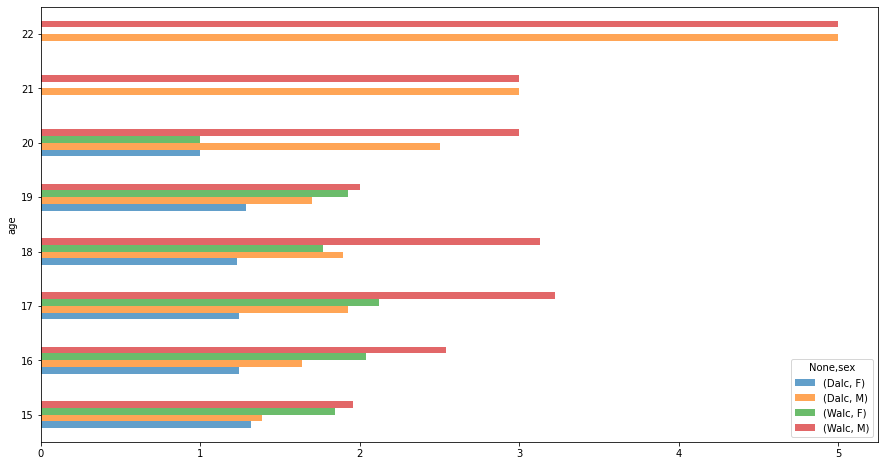

In [12]:
tabla.plot(kind = 'barh',
 figsize = (15,8),
 alpha = 0.7)

# sin tomar en cuenta las edades de 21 y 22 pues son outliers, podemos observar que los hombres consumen mas alcohol que las
# mujeres, esto tanto en dias de la semana (Dalc) y fin de semana (Walc)

In [14]:
tabla2 = pd.pivot_table(df,
                     index = ['age'],
                     columns = ['sex'],
                     values = ['failures']
                        
                     )
tabla2

failures          
sex         F         M
age                    
15   0.421053  0.136364
16   0.259259  0.200000
17   0.120690  0.425000
18   0.186047  0.410256
19   1.142857  1.200000
20   2.000000  1.000000
21        NaN  3.000000
22        NaN  3.000000

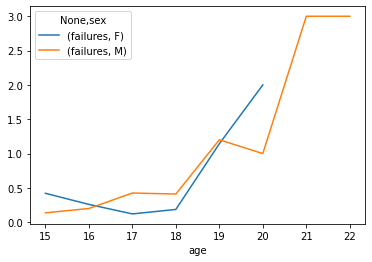

In [15]:
tabla2.plot(kind='line')

# Sin considerar las edadesd 21 y 22, los resultados de ambos sexos en cuanto a materias reprobadas (failures),
# son muy similares entre si.

In [16]:
tabla3 = pd.pivot_table(df,
                     index = ['age'],
                     columns = ['Pstatus'],
                     values = ['failures']
                        
                     )
tabla3

failures          
Pstatus         A         T
age                        
15       0.333333  0.257143
16       0.555556  0.200000
17       0.200000  0.250000
18       0.000000  0.315789
19       0.500000  1.227273
20       1.000000  2.000000
21            NaN  3.000000
22            NaN  3.000000

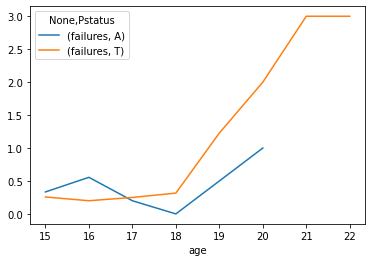

In [17]:
tabla3.plot(kind='line') 
# aqui podemos observar que los alumnos con padres separados (A) a edades tempranas pueden sufrir de mayor numero de 
# materias reprobadas y a edades mas avanzadas los alumnos con padres juntos tienden a tener mayor numero de failures

In [22]:
tabla4 = pd.pivot_table(df,
                     index = ['failures'],
                     columns = ['sex'],
                     values = ['Dalc', 'Walc']
                        
                     )
tabla4

Dalc                Walc          
sex              F         M         F         M
failures                                        
0         1.232143  1.631944  1.952381  2.500000
1         1.217391  2.074074  1.739130  3.148148
2         1.636364  2.000000  2.363636  3.166667
3         1.333333  2.100000  2.166667  3.400000

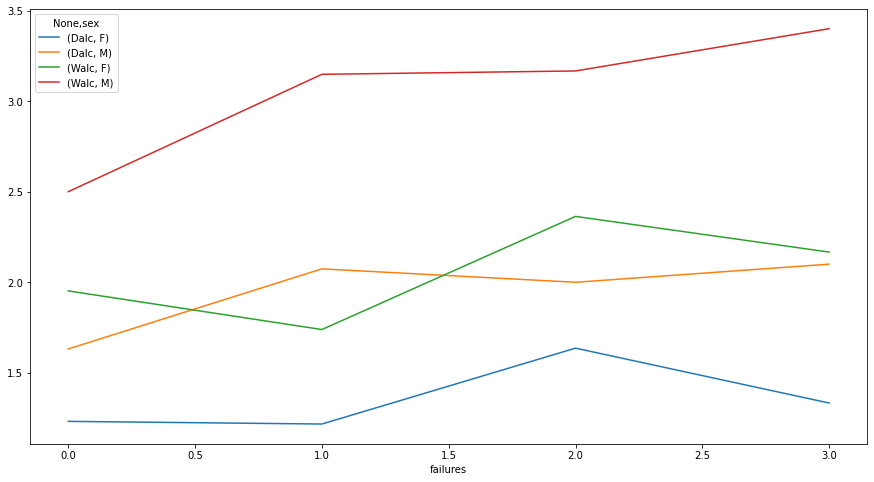

In [23]:
tabla4.plot(kind='line',
           figsize = (15,8))

# Podemos observar que los alumnos hombres que toman alcohol los fines de semana tienden a tener mayor numero de failures

In [32]:
tabla5 = pd.pivot_table(df,
                     index = ['age'],
                     columns = ['failures'],
                     values = ['absences']
                        
                     )
tabla5

absences                            
failures         0          1     2          3
age                                           
15        3.267606   3.333333   4.4   3.333333
16        5.193182   8.300000   5.5   2.500000
17        5.952381  11.625000  11.0   4.500000
18        5.809524   7.750000   0.0   3.000000
19        9.400000  12.384615  11.0   3.333333
20        0.000000        NaN   7.5        NaN
21             NaN        NaN   NaN   3.000000
22             NaN        NaN   NaN  16.000000

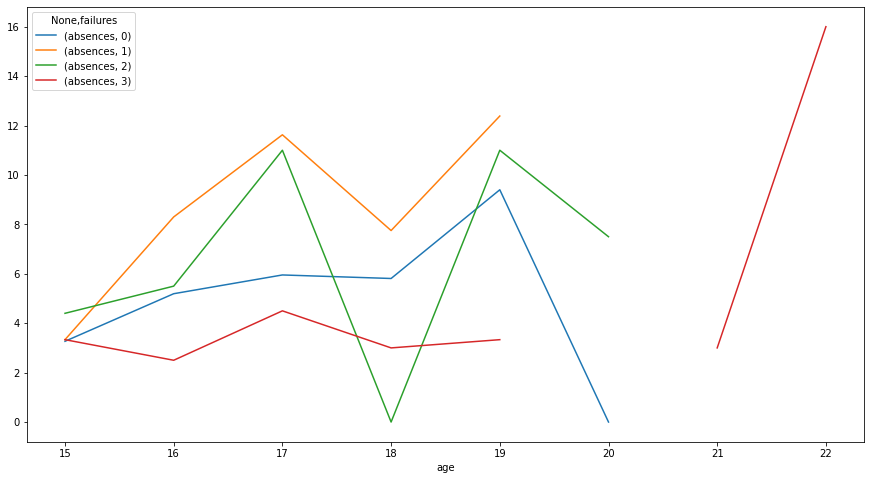

In [30]:
tabla5.plot(kind='line',
           figsize = (15,8))

# Podemos observar que las ausencias no tienen una relacion directa con los failures de los alumnos